<a href="https://colab.research.google.com/github/Yugabharathi/PYTHON-ASSIGNMENTS/blob/main/Demo/Cascade_TabNet_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="https://github.com/DevashishPrasad/CascadeTabNet/blob/master/Demo/imgs/CVPR%20Teaser.gif?raw=1" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [1]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9 MB 24 kB/s 
     |████████████████████████████████| 4.0 MB 19.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0+cu100 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0+cu100 which is incompatible.
     |████████████████████████████████| 405 kB 5.3 MB/s 
     |██████████████████

Streaming output truncated to the last 5000 lines.
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/data.h:3,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/csrc/api/include/torch/all.h:4,
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/extension.h:4,
                 from mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:1:
/usr/local/lib/python3.7/dist-packages/torch/include/c10/util/Exception.h:330:13: note: declared here
 inline void deprecated_AT_CHECK() {}
             ^~~~~~~~~~

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.


## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [2]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 675 (delta 4), reused 8 (delta 1), pack-reused 656
Receiving objects: 100% (675/675), 16.56 MiB | 26.25 MiB/s, done.
Resolving deltas: 100% (321/321), done.


## 3. Download the Pretrained Model



In [3]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/mmdetection/epoch_36.pth
100% 664M/664M [00:03<00:00, 194MB/s]


## 4. Run the Predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


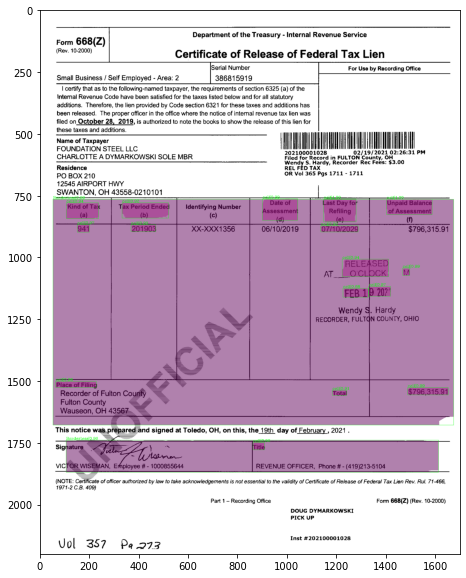

In [5]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/mmdetection/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/mmdetection/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/doc14page_0.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

In [1]:
!pip install mmcv==0.4.3

     |████████████████████████████████| 53 kB 1.1 MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp37-cp37m-linux_x86_64.whl size=171236 sha256=cf1dbf00d7835f3322fee3ad39f405c579fa1cdd5455896194a3aa415d576659
  Stored in directory: /root/.cache/pip/wheels/0e/d1/95/11a3b3bfc1a6b81059a407214e7bb84fdbf6ecfd292a298e9f
Successfully built mmcv
  Attempting uninstall: mmcv
    Found existing installation: mmcv 1.4.2
    Uninstalling mmcv-1.4.2:
      Successfully uninstalled mmcv-1.4.2


In [5]:
pip install Pillow==6.2.2.

  Using cached Pillow-6.2.2-cp37-cp37m-manylinux1_x86_64.whl (2.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 6.2.1
    Uninstalling Pillow-6.2.1:
      Successfully uninstalled Pillow-6.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 6.2.2 which is incompatible.


In [6]:
res_borderTable = []
res_borderlessTable = []
res_cell = []

## for tables with borders
for r in result[0][0]:
    if r[4]>.85:
        res_borderTable.append(r[:4].astype(int))
    ## for cells
for r in result[0][1]:
    if r[4]>.85:
        r[4] = r[4]*100
        res_cell.append(r.astype(int))
    ## for borderless tables
for r in result[0][2]:
    if r[4]>.85:
        res_borderlessTable.append(r[:4].astype(int))

In [8]:
print(res_borderlessTable)

[array([ 105, 1739, 1609, 1869]), array([  52,  765, 1670, 1678])]


In [9]:
print(res_borderTable)

[]


In [42]:
from glob import glob

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


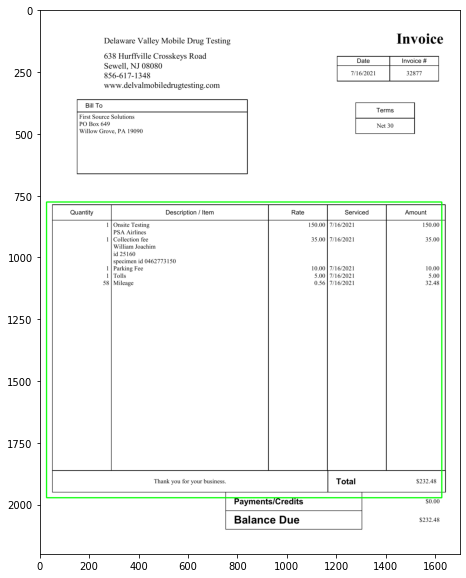

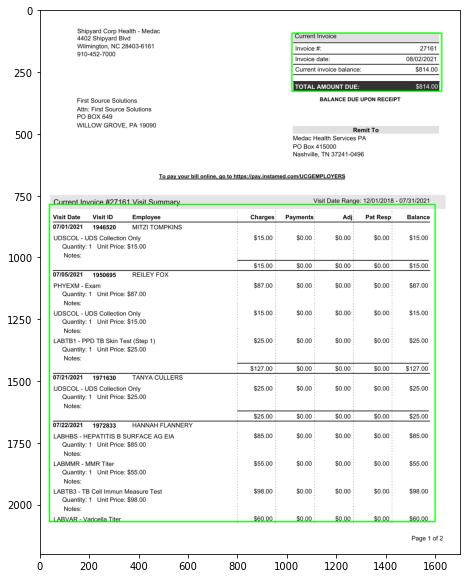

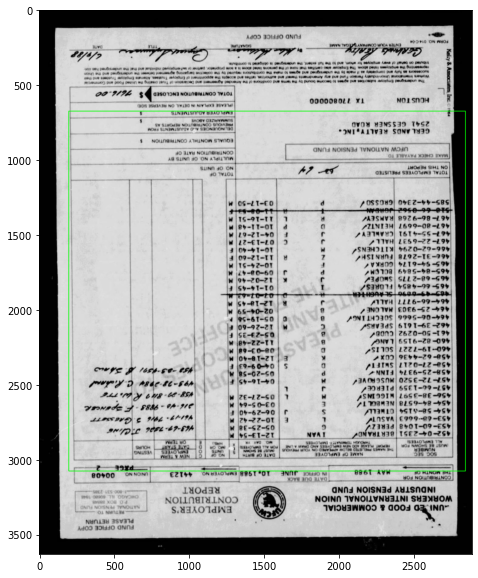

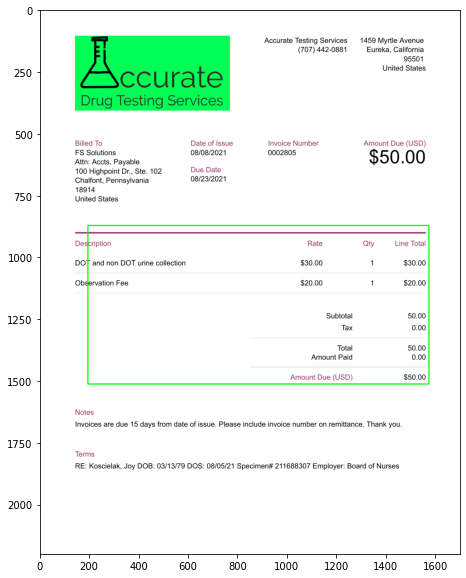

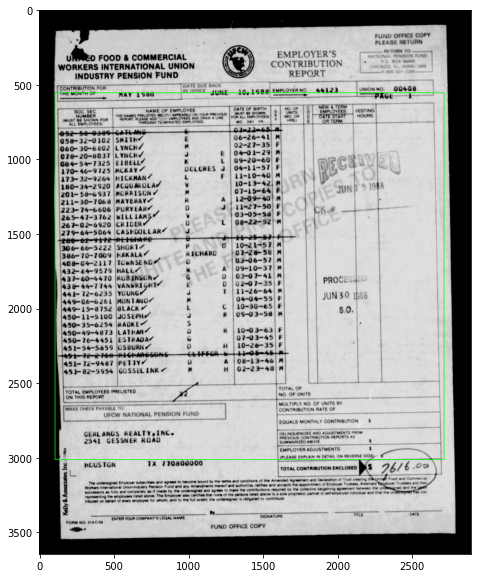

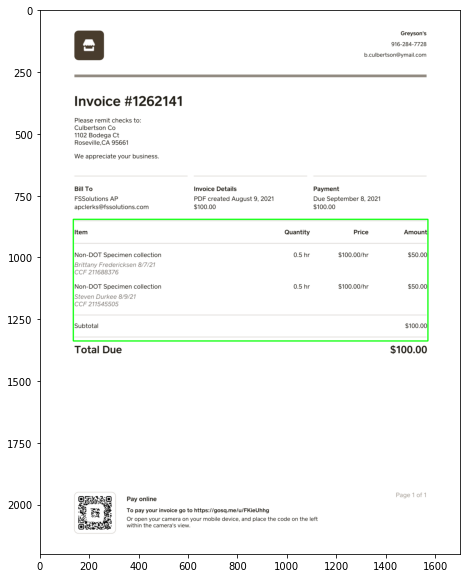

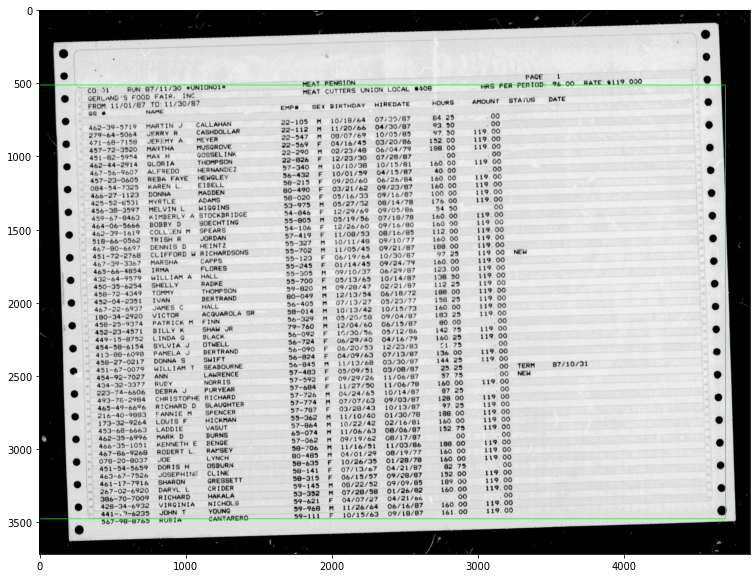

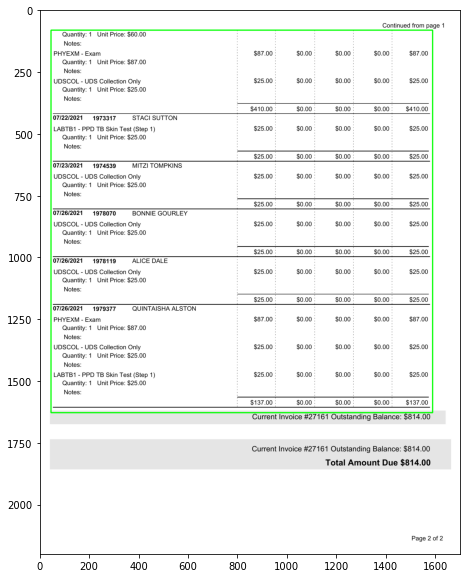

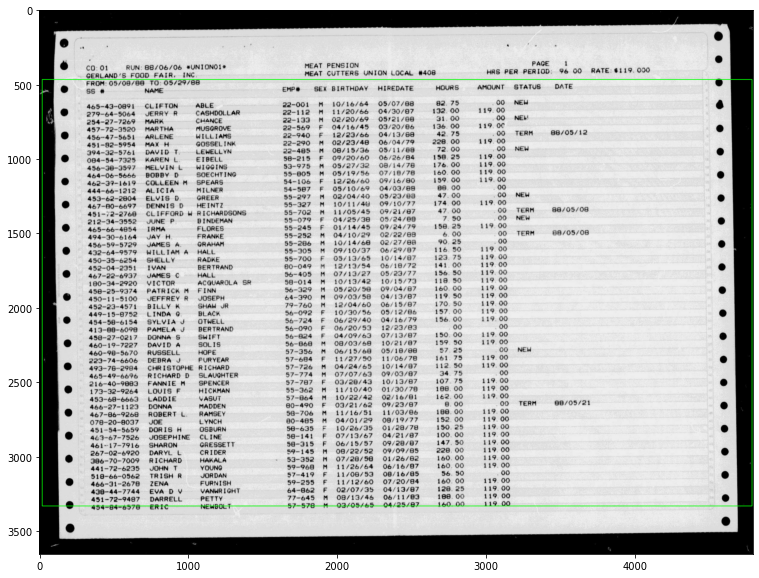

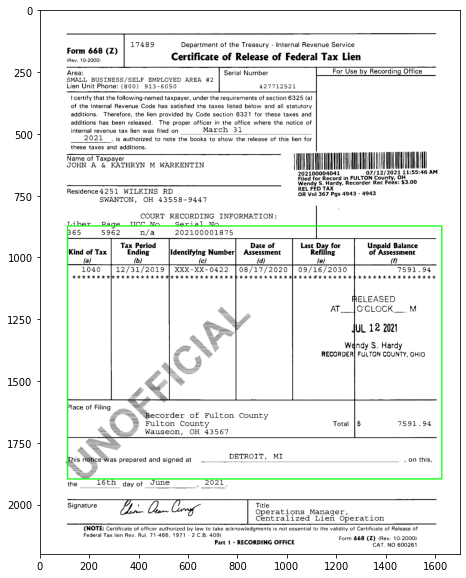

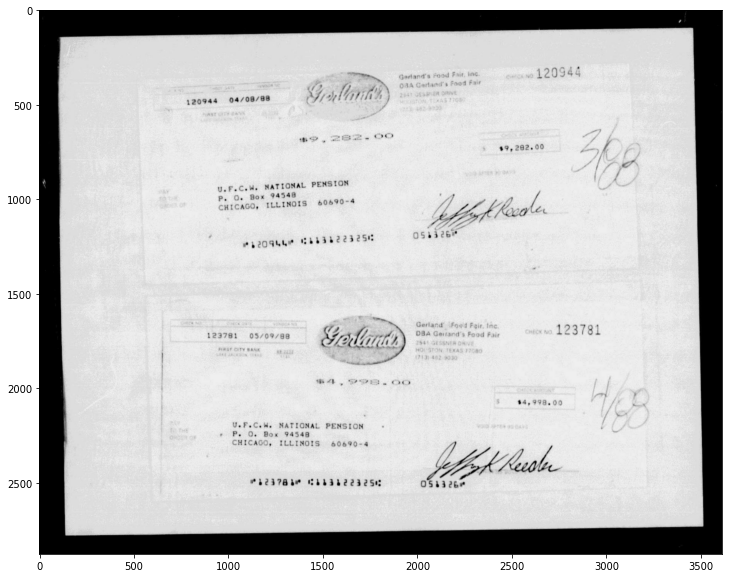

In [45]:
files=glob('/content/png_images/*')
for images in files:
  out_put=table_extraction(images)
  # plt.imshow(out_put)
  # plt



In [43]:
x,y,x1,y1=res_borderlessTable[1]
# print(x,y,x1,y1)

def table_extraction(path):
  config_file = '/content/mmdetection/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
  checkpoint_file = '/content/mmdetection/epoch_36.pth'
  model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
  img = path

  # Run Inference
  result = inference_detector(model, img)

# Visualization results
  show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)
  res_borderTable = []
  res_borderlessTable = []
  res_cell = []
  for r in result[0][0]:
    if r[4]>.85:
        res_borderTable.append(r[:4].astype(int))
    ## for cells
  for r in result[0][1]:
      if r[4]>.85:
          r[4] = r[4]*100
          res_cell.append(r.astype(int))
    ## for borderless tables
  for r in result[0][2]:
      if r[4]>.85:
          res_borderlessTable.append(r[:4].astype(int))
  image=cv2.imread(path)
  imagecopy=image.copy()

  for i in res_borderlessTable:
    x,y,x1,y1=i
    # print(x,y)
    
    cv2.rectangle(imagecopy,(x,y),(x1,y1),(0,255,0),3)
  # cv2.rectangle(imagecopy,(x2,y2),(x3,y3),(0,255,0),3)
    plt.imshow(imagecopy)
  for j in res_borderTable:
    x,y,x1,y1=j # print(x,y)
    
    cv2.rectangle(imagecopy,(x,y),(x1,y1),(0,255,0),3)
# cv2.rectangle(imagecopy,(x2,y2),(x3,y3),(0,255,0),3)
  plt.imshow(imagecopy)
  return imagecopy
# image=table_extraction()
# plt.imshow(imagecopy)



In [23]:
  image=cv2.imread('/content/doc14page_0.png')

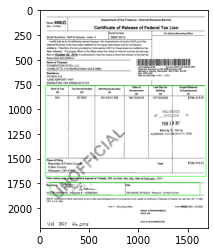

In [32]:
# print(res_borderlessTable)
# print(res_borderTable)
imagecopy=image.copy()
x,y,x1,y1=res_borderlessTable[1]
x2,y2,x3,y3=res_borderlessTable[0]
for i in res_borderlessTable:
  x,y,x1,y1=i
  # print(x,y)
  
  cv2.rectangle(imagecopy,(x,y),(x1,y1),(0,255,0),3)
# cv2.rectangle(imagecopy,(x2,y2),(x3,y3),(0,255,0),3)
  plt.imshow(imagecopy)
for j in res_borderTable:
  x,y,x1,y1=j # print(x,y)
  
  cv2.rectangle(imagecopy,(x,y),(x1,y1),(0,255,0),3)
# cv2.rectangle(imagecopy,(x2,y2),(x3,y3),(0,255,0),3)
  plt.imshow(imagecopy)

In [35]:
file_location='/content/png_images.zip'

In [37]:
!unzip /content/png_images.zip

Archive:  /content/png_images.zip
   creating: png_images/
  inflating: png_images/doc0page_0.png  
  inflating: png_images/page1.png    
  inflating: png_images/page3.png    
  inflating: png_images/page4.png    
  inflating: png_images/page5.png    
  inflating: png_images/page38.png   
  inflating: png_images/inv1.png     
  inflating: png_images/inv2.png     
  inflating: png_images/inv3.png     
  inflating: png_images/inv4.png     
  inflating: png_images/inv6.png     


In [11]:
import cv2

In [18]:
import matplotlib.pyplot as plt

After this, use TSR postprocessing for best result

# Cite as
If you find this work useful for your research, please cite our paper:

```
@misc{ cascadetabnet2020,
    title={CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents},
    author={Devashish Prasad and Ayan Gadpal and Kshitij Kapadni and Manish Visave and Kavita Sultanpure},
    year={2020},
    eprint={2004.12629},
    archivePrefix={arXiv},
    primaryClass={cs.CV}
}
```
